In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = "%m/%d/%y")

In [7]:
# Convert the 'Year' column values to strings and add a default month and day
df['Year_Birth'] = ['01/01/' + str(year)[-2:] for year in df['Year_Birth']]

# Convert the 'Dt_Customer' column values to datetime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%m/%d/%y')

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970-01-01,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,2061-01-01,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,2058-01-01,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,2067-01-01,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989-01-01,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [9]:
df.rename(columns={' Income ':'Income'},inplace=True)

In [10]:
df['Income'] = df['Income'].str.replace('$','')

In [11]:
df['Income'] = df['Income'].str.replace(',','').astype(float)

In [12]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [13]:
df.sort_values('ID',axis=0,ascending=True,inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985-01-01,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,9,1,0,0,0,0,0,0,0,SA
1,1,2061-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
1956,9,1975-01-01,Master,Single,46098.0,1,1,2012-08-18,86,57,...,2,8,0,0,0,0,0,0,0,CA
1311,13,2047-01-01,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,3,6,0,0,0,0,0,0,0,SA
1834,17,1971-01-01,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,7,5,0,0,0,0,0,0,0,SP


In [14]:
df['Income'].describe().T

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [15]:
median = df['Income'].median()
print(f"Also, Median is {median}")

Also, Median is 51381.5


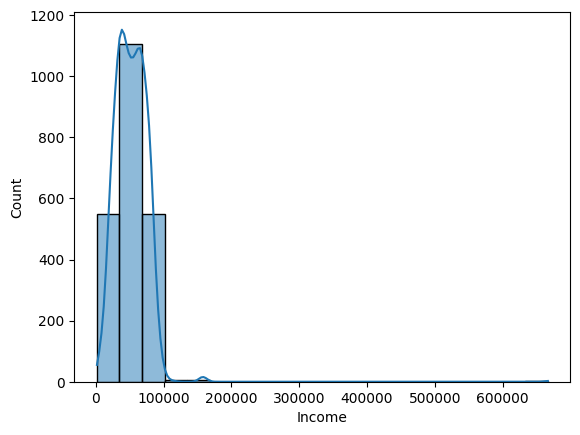

In [16]:
ax = sns.histplot(df['Income'],kde=True,bins=20)

In [17]:
df['Income']=df['Income'].fillna(df['Income'].median())

#we can check if the NaN values have been removed by :
df['Income'].isna().sum()

0

In [18]:
import datetime
from datetime import datetime
from datetime import date #we use datetime library to get the current date (now)
current_year = date.today().year #current year is assigned to variable 'current_year'


In [21]:
df['Age'] = (df['Dt_Customer'] - df['Year_Birth']) // pd.Timedelta(days=365)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
1503,0,1985-01-01,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,1,0,0,0,0,0,0,0,SA,28
1,1,2061-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,-47
1956,9,1975-01-01,Master,Single,46098.0,1,1,2012-08-18,86,57,...,8,0,0,0,0,0,0,0,CA,37
1311,13,2047-01-01,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,6,0,0,0,0,0,0,0,SA,-34
1834,17,1971-01-01,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,5,0,0,0,0,0,0,0,SP,42


In [22]:
df.shape

(2240, 29)

In [23]:
current_date = datetime.now()

In [27]:
df = df[df['Year_Birth'] <= current_date]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
1503,0,1985-01-01,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,1,0,0,0,0,0,0,0,SA,28
1956,9,1975-01-01,Master,Single,46098.0,1,1,2012-08-18,86,57,...,8,0,0,0,0,0,0,0,CA,37
1834,17,1971-01-01,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,5,0,0,0,0,0,0,0,SP,42
2237,22,1976-01-01,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,36
817,35,1987-01-01,Graduation,Married,25545.0,1,0,2012-09-08,35,32,...,6,0,0,0,0,0,1,0,SP,25


In [28]:
df.shape

(1238, 29)

In [88]:
df.groupby('Education')['Age'].agg(['mean', 'median',  'count'])

,mean,median,count
Education,,,
2n Cycle,33.678571,35.0,140
Basic,30.581395,32.0,43
Graduation,35.048212,36.0,643
Master,36.558011,38.0,181
PhD,36.688312,38.0,231


In [65]:
grouped1 = df.groupby(['Education', 'Age'])['Income'].agg(['mean', 'median', 'count'])
grouped1 = grouped1.reset_index()
grouped1

,Education,Age,mean,median,count
0,2n Cycle,13,36640.000000,36640.00,1
1,2n Cycle,16,7500.000000,7500.00,1
2,2n Cycle,17,81937.000000,81937.00,2
3,2n Cycle,20,87000.000000,87000.00,1
4,2n Cycle,21,47331.000000,60182.00,3
...,...,...,...,...,...
120,PhD,41,52522.636364,45589.50,22
121,PhD,42,54462.583333,48922.25,18
122,PhD,43,58889.050000,60198.00,20
123,PhD,44,50705.000000,56242.00,13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


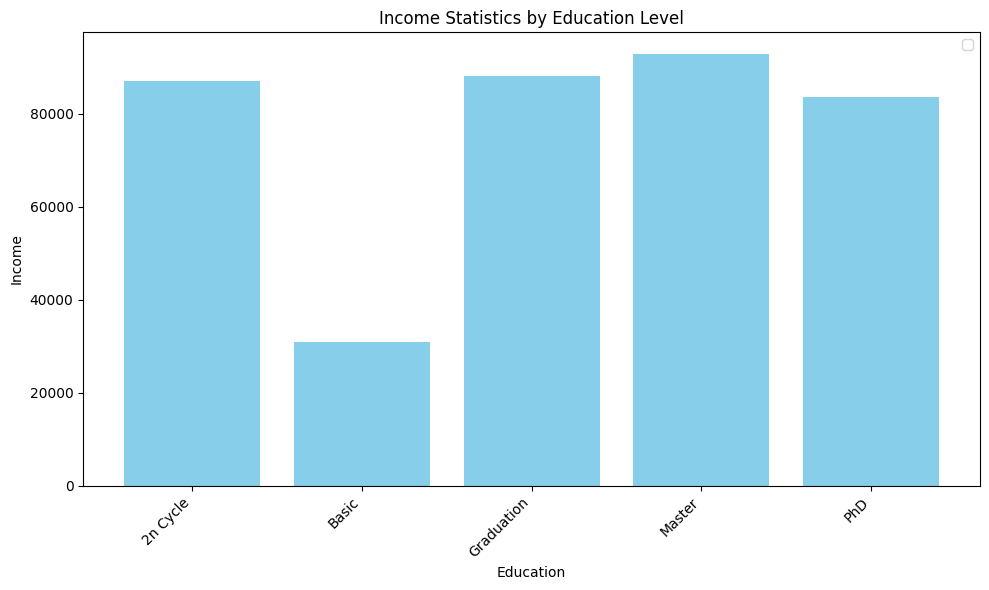

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(grouped1['Education'], grouped1['mean'], color='skyblue')


plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income Statistics by Education Level')
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


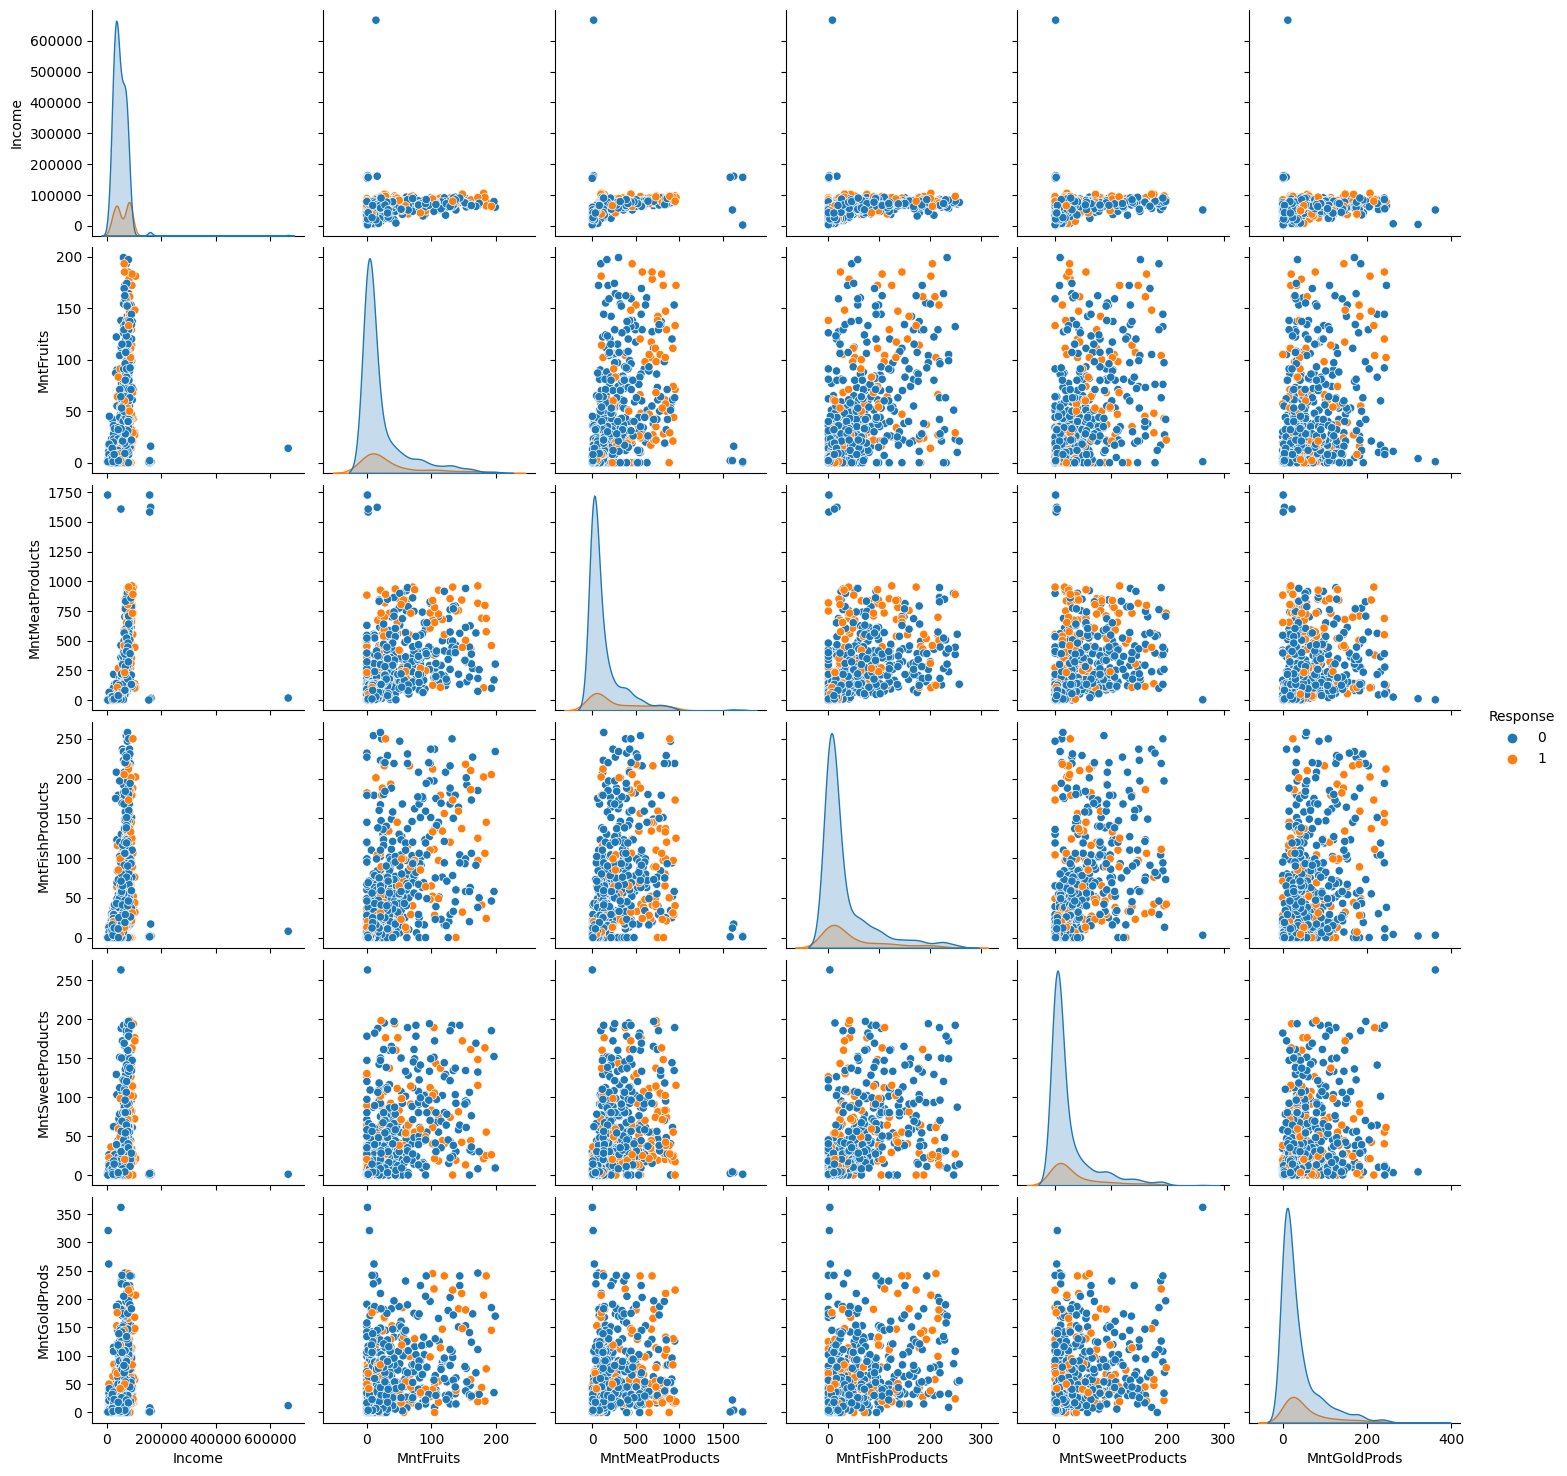

In [80]:
sns.pairplot(data=df, vars=['Income','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], hue='Response')

In [82]:
group_A = df[df['Education'] == 'Master']['Income']
group_B = df[df['Education'] == 'PhD']['Income']

In [85]:
from scipy.stats import ttest_ind

# Perform t-test
t_statistic, p_value = ttest_ind(group_A, group_B, equal_var=False)
print(t_statistic, p_value)

-2.279214916224474 0.02319390189172929


In [84]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in income between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in income between the two groups.")

Reject the null hypothesis. There is a significant difference in income between the two groups.


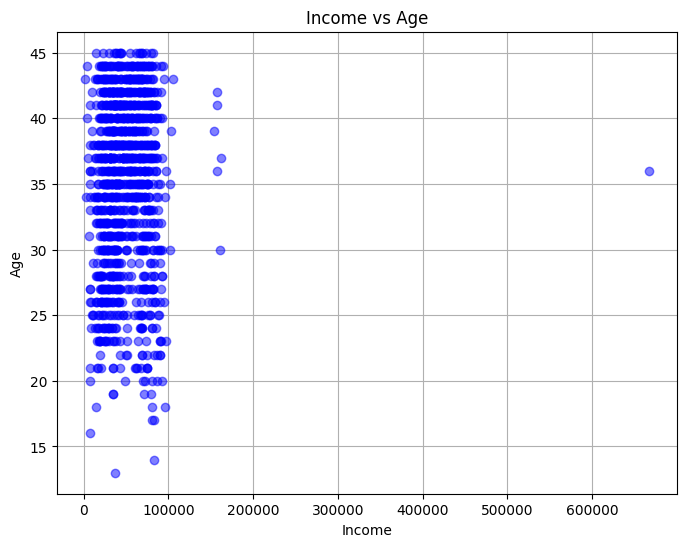

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(df['Income'], df['Age'], 'o', color='blue', alpha=0.5)
plt.title('Income vs Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)
plt.show()

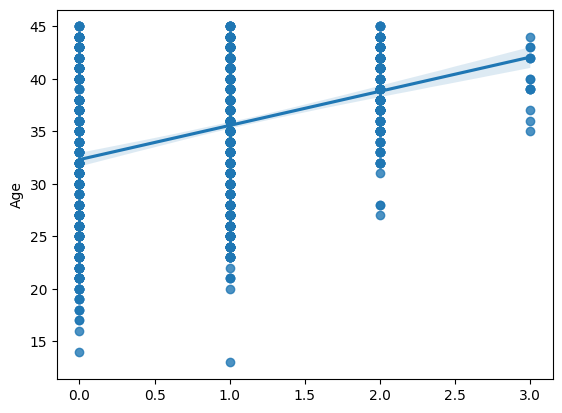

In [99]:
Dependents = df['Kidhome']+df['Teenhome'] #numerical data
ax = sns.regplot(x=Dependents,y=df['Age'])

In [106]:
X = df.select_dtypes(include=['number']).drop(columns=['Income'])
X

,ID,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
1503,0,0,0,66,239,10,554,254,87,54,...,9,1,0,0,0,0,0,0,0,28
1956,9,1,1,86,57,0,27,0,0,36,...,2,8,0,0,0,0,0,0,0,37
1834,17,0,1,81,637,47,237,12,19,76,...,7,5,0,0,0,0,0,0,0,42
2237,22,1,0,99,185,2,88,15,5,14,...,5,8,0,0,0,0,0,0,0,36
817,35,1,0,35,32,1,64,16,12,85,...,3,6,0,0,0,0,0,1,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,11148,1,0,85,2,1,4,3,1,2,...,2,8,0,0,0,0,0,0,0,38
288,11176,0,1,12,376,9,83,19,4,4,...,7,3,0,0,0,0,0,0,0,44
1554,11178,1,0,69,15,2,10,0,1,4,...,3,7,0,0,0,0,0,0,0,42
529,11187,1,0,23,2,8,10,12,14,23,...,3,5,0,0,0,0,0,0,0,35


In [107]:
y = df['Income']
y

1503    70951.0
1956    46098.0
1834    60491.0
2237    46310.0
817     25545.0
         ...   
1928    22280.0
288     65968.0
1554    42394.0
529     26487.0
261     41411.0
Name: Income, Length: 1238, dtype: float64

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [111]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [112]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

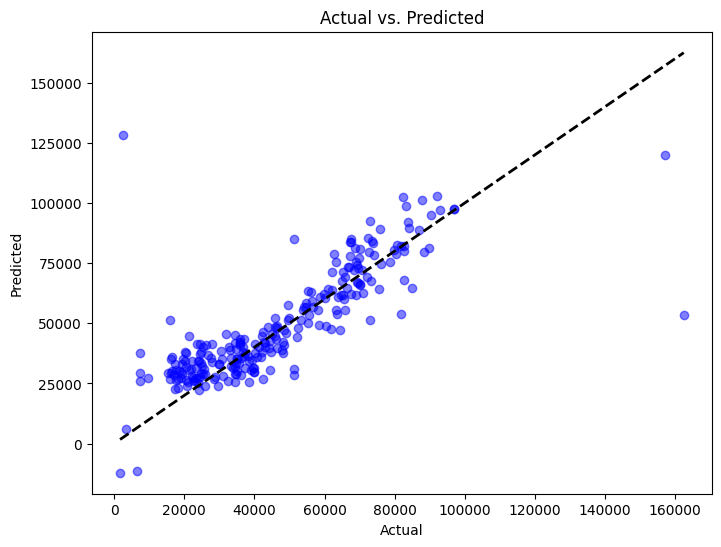

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [116]:
import statsmodels.api as sm

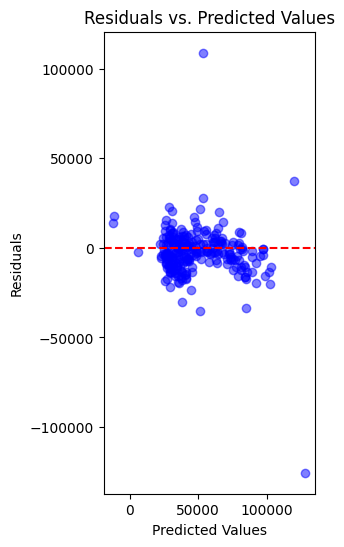

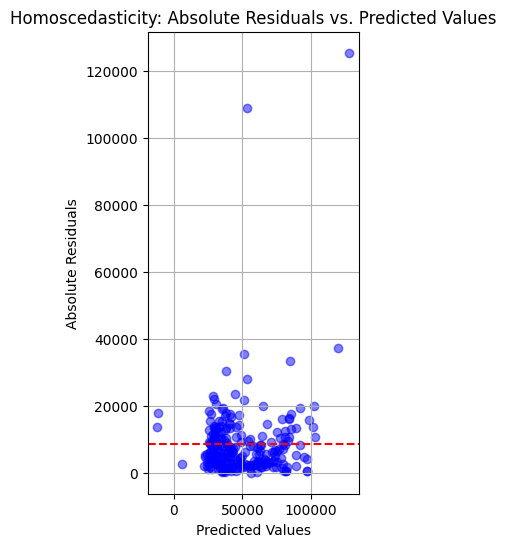

In [130]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0


abs_residuals = np.abs(y_test - y_pred)

# Plot absolute residuals vs. predicted values
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_pred, abs_residuals, color='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Homoscedasticity: Absolute Residuals vs. Predicted Values')
plt.axhline(y=np.mean(abs_residuals), color='red', linestyle='--')  # Add horizontal line at mean
plt.grid(True)
plt.show()